# Linux Command Syntax

Commands typically have the syntax: **`command option(s) argument(s)`**

**Options**:
* Modify the way that a command works.
* Usually consists of a hyphen or dash followed by a single letter.
* Some commands accept multiple options that can usually be grouped after a single hyphen.

**Arguments**:
* Most commands are used together with one or more arguments.
* Some commands assume a default argument if none is supplied.
* Arguments are optional for some commands and required by others.

# File Permission command: `chmod`

UNIX is a multi-user system.
* Every file and directory in your account can be protected from or made accessible to other users by changing its access permissions.
* Every user is responsible for controlling access to their files.

Permissions for a file or directory may be restricted to by types.

There are 3 types of permissions
* `r` - read 
* `w` - write
* `x` - execute = running a program

Each permission (`rwx`) can be controlled at three levels:
* `u` - user = yourself
* `g` - group = can be people in the same project
* `o` - other = everyone on the system
* `a` - all (u,g & o)

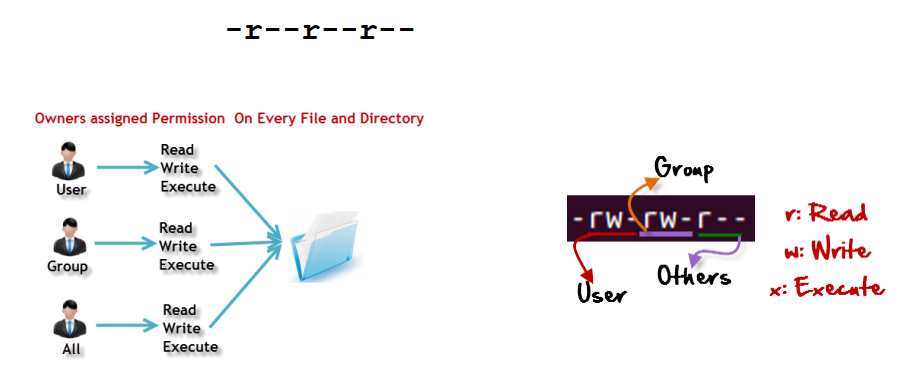

File or Directory permissions can be displayed by running `ls –l` command: `-rwxrwxrwx`

Command to change permission: `chmod`

**Examples**:
```bash
chmod u-x myfile
chmod g-x myfile
chmod o+x myfile

chmod ugo-x myfile
chmod ugo+x myfile

chmod u+wx myfile
chmod g+wx myfile
chmod o-wx myfile

chmod ugo+rwx myfile
chmod ugo-rwx myfile

chmod a+rwx myfile
chmod a-rwx myfile
```

# File permission using numeric mode

**Permission to a file and directory can also be assigned numerically**:
```bash
chmod ugo+r FILE
# OR
chmod 444 FILE
```

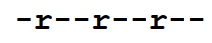

**The table below assigns numbers to permission types**:

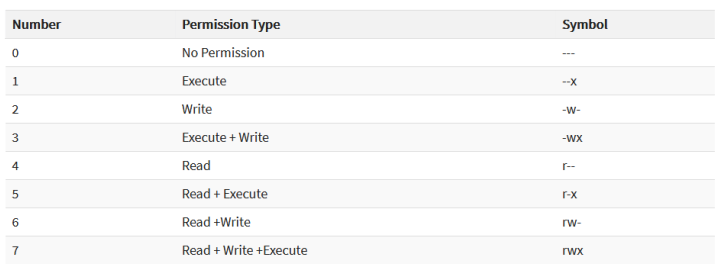

**Example**:
```bash
chmod 764 FILE
```

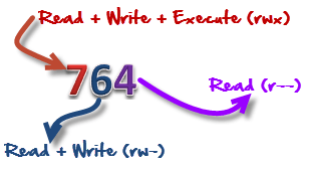


**Online calculators can be used as well.**

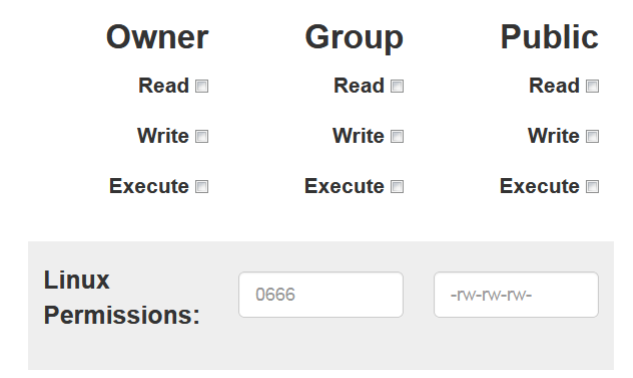

# File Ownership commands: `chown`, `chgrp`

* There are 2 owners of a file or directory: **user** and **group**.
* Command to change file ownership: `chown` and `chgrp`.
    * `chown` changes the ownership of a file.
    * `chgrp` changes the group ownership of a file.
* Recursive ownership change option (Cascade): `-R`

**Example**:
```bash
chown newuser myfile1 myfile2
chown -R newuser myfile1 myfile2

chgrp newgroup myfile1 myfile2
chgrp -R newgroup myfile1 myfile2
```

# Access Control List (ACL)

**What is ACL?**
* Access control list (ACL) provides an additional, more flexible permission mechanism for file systems.
* It is designed to assist with UNIX file permissions. ACL allows you to give permissions for any user or group to any disc resource.

**Use of ACL**: 
* Think of a scenario in which a particular user is not a member of group created by you but still you want to give some read or write access, how can you do it without making user a member of group, here comes in picture Access Control Lists, ACLs helps us to do this trick.
* Basically, ACLs are used to make a flexible permission mechanism in Linux.
* From linux man pages, ACLs are used to define more fine-grained discretionary access rights for files and directories.
* `setfacl` and `getfacl` are used for setting up ACLs and showing ACLs, respectively.

**For example**: `getfacl test/seinfeld.txt`

**Output**:
```bash
# file: test/seinfeld.txt
# owner: iafzal
# group: iafzal
user::rw
group::rw
other::r--
```

**List of commands for setting up ACL**:
```bash
# 1) To add permissions for a user (user is either the user name or ID)
# setfacl -m "u:user:permissions" /path/to/file
setfacl -m "u:user:rwx" /path/to/file

# 2) To add permissions for a group (group is either the group name or ID):
# setfacl -m "g:group:permissions" /path/to/file
setfacl -m "g:group:rwz" /path/to/file

# 3) To allow all files or directories to inherit ACL entries from the directory it is within
setfacl -dm "entry" /path/to/dir

# 4) To remove a specific entry (for a specific user)
setfacl -x "u:user" /path/to/file

# 5) To remove all entries (for all users)
setfacl -b path/to/file
```

> Note:
> * As you assign the ACL permission to a file/directory, it adds a `+` sign at the end of the permission.
> * Setting `w` permission with ACL does not allow to removal of a file.

**View ACL**:

To show permissions:
```bash
getfacl filename
```

**Output before ACL modification**:
```bash
# file: filename
# owner: root
# group: root
user::rw
group::rw
other::r--
```

Add permission to a specific user **kiran** to read & write the file called **filename**.
```bash
setfacl -m "u:kiran:rw" filename
```

**Output after adding ACL permission**:
```bash
# file: filename
# owner: root
# group: root
user::rw
user:kiran:rw   # ACL entry added for user "kiran"
group::rw
other::r--
```

> Observe the difference between the output of `the getfacl` command before and after setting up ACL permissions using the `setfacl` command.

You can also check if there are any extra permissions set through ACL using the `ls` command.
```bash
check set acl with ls
```

Observe the first command output in the image, there is an extra **“+”** sign after the permissions like **`-rw-rwxr–+`**, this indicates there are extra ACL permissions set, which you can check by the `getfacl` command.

# `help` command

There are 3 types of help commands
* `whatis` **command**
* **command** `–-help`
* `man` **command**


# TAB Completion and Up Arrow

Hitting the **TAB** key completes the available commands, files, or directories.
* `chm TAB`
* `ls j<TAB>`
* `cd Des<TAB>`

Hitting up arrow key on the keyboard returns the last command run.

# Adding Text to Files (Redirects)

3 Simple ways to add text to a file:
* vi
* Redirect command output `>` **or** `>>`
* using `echo`
    * `echo >`: Overwrites the file
    * `echo >>`: append contents to the file

# Input & Output Redirects

There are 3 redirects in Linux
1. Standard input (**stdin**) it has a file descriptor number as 0.
2. Standard output (**stdout**) it has a file descriptor number as 1.
3. Standard error (**stderr**) it has a file descriptor number as 2.

---

Output (**stdout**) - 1
* By default, when running a command, its output goes to the terminal.
* The output of a command can be routed to a file using `>` symbol.

**Example**:
```bash
ls -l > listings
pwd > findpath
```

* If using the same file for additional output or to append to the same file, then use `>>`.

**Example**:
```bash
ls –la >> listings
echo “Hello World” >> findpath
```

---

Input (**stdin**) - 0

Input is used when feeding file contents to a file

**Example**:
```bash
cat < listings
mail –s “Office memo” allusers@abc.com < memoletter
```

---

Error (**stderr**) - 2
* When a command is executed, we use a keyboard and that is also considered (stdin -0)
* That command output goes on the monitor, and that output is (stdout – 1)
* If the command produced any error on the screen, then it is considered (stderr – 2)
* We can use redirects to route errors to the screen

**Example**:
```bash
ls –l /root 2> errorfile
telnet localhost 2> errorfile
```

# Standard Output to a File (`tee`)

The **“tee”** command is used to store and view (both at the same time) the output of any command.

The command is named after the **T-splitter** used in plumbing. 
* It basically breaks the output of a program so that it can be both displayed and saved in a file.
* It does both tasks simultaneously, copies the result into the specified files or variables, and also displays the result.

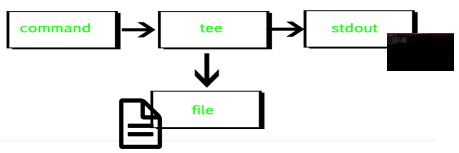

**Example**:
```bash
# print in console as well as WRITE the output to myfile
echo "Hello" | tee myfile1 myfile2

# print in console as well as APPEND the output to myfile
echo "Kiranmoy" | tee -a myfile1 myfile2
```

# Pipes (|)

A pipe is used by the shell to connect the output of one command directly to the input of another command.

The symbol for a pipe is the vertical bar (`|`). 

The command syntax is:
```bash
command1 [arguments] | command2  [arguments]
```

**Example**:
```bash
ls -l | more
```

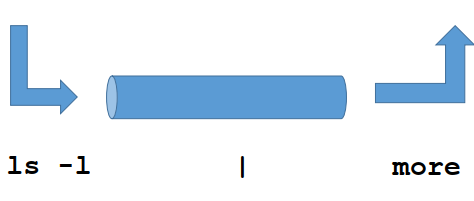

# Executing multiple commands with `;`

```bash
# Executing multiple commands in a single line with ;
ls; pwd; whoami
```

* Each command works independently.
* Even if one fails, the next will still execute.

# File Maintenance Commands

* `cp` (copy files)
* `rm` (remove file)
* `mv` (move/rename file or directory)
* `mkdir` (make directory)
* `rmdir` (remove empty directory only)
* `rm -r` (remove sub-directories & files recursively)
* `rm -rf` (forcefully remove sub-directories and their contents)
* `chgrp` (change group)
* `chown` (change owner)

**Examples**:
```bash
cp source destination
rm filename
mv source destination
mkdir dirname
rmdir dirname
rm -r dirname
chgrp newgroup myfile
chown newuser:newgroup myfile
```

# File Display Commands

* `cat` (display whole contents of file)
* `more` (display contents of file, one page at a time, only in forward direction)
* `less` (display contents of a file one page at a time in both forward & backward direction)
* `head` (display top n lines)
* `tail` (display bottom n lines)

**Example**:
```bash
cat file1
more file1
less file1
head -10 file1
tail -10 file1
```

# Filters / Text Processors Commands

* `cut`
* `awk`
* `grep` and `egrep`
* `sort`
* `uniq`
* `wc`

## `cut` command

`cut` is a command-line utility that allows you to **cut parts of each line** from specified files or piped data and print the result to standard output. 

It can be used to cut parts of a line by:
* delimiter,
* byte position, and
* character position

**Example**:
```bash
# Does not work
cut filename 

# Check version
cut --version

# cut the 1st character of each line
cut –c1 filename

# Pick and choose the character position to be cut from each line
cut –c1,2,4 filename

# cut the range of characters of each line
cut –c1-3 filename

# cut specific ranges of characters of each line
cut –c1-3,6-8 filename 

# cut by the byte size of each line
cut –b1-3 filename

# cut the first 6th column of each line, separated by delimiter(:) 
# -d refers to the delimiter
# -f refers to the field number or position
cut -d: -f 6 /etc/passwd

# cut the first 6 and 7th columns of each line, separated by delimiter(:) 
# -d refers to the delimiter
# -f refers to the field number or position
cut -d: -f 6-7 /etc/passwd

# Only print user permissions of the files/directories
ls –l | cut –c2-4
```

## `awk` command

* `awk` is a utility/language designed for data extraction. 
* Most of the time, it is used to extract fields from a file or from an output.

> Note that field & column ar synonomous.

**Example**:
```bash
# Check version
awk --version

# Extract the 1st field from a file
awk '{print $1}' file

# Extrac 1st and 3rd field of ls –l output
ls –l | awk '{print $1,$3}'

# Extract the Last field of the output
ls –l | awk '{print $NF}'

# Search & Extract the line having a specific word
awk '/Jerry/ {print}' file

# Extract the 1st field of /etc/passwd separated by delimiter(:)
awk -F: '{print $1}' /etc/passwd

# Replace a field with another word ($0 means complete line)
echo "Hello Tom" | awk '{$2="Adam"; print $0}'

# Replace a field with another word ($0 means complete line)
cat file | awk '{$2="Imran"; print $0}'

# Get lines that have more than 15 bytes in size
awk 'length($0) > 15' file

# Get the line whose 9th field matches 'Seinfeld' in /home/iafzal
ls -l | awk '{if($9 == "seinfeld-characters.txt") print $0;}'

# Number of fields
ls -l | awk '{print NF}'
```

## `grep`/`egrep` commands

**What is grep?**

The `grep` command stands for **"global regular expression print"**, processes text line by line, and prints any lines that match a specified pattern.

**Example**:
```bash
# Check version or help
grep –-version 
grep --help

# Search for a keyword in a file
grep keyword file

# Search for a keyword and return the count of the keyword
grep –c keyword file

# Search for a keyword, ignore case-sensitive
grep –i KEYword file

# Display the matched lines and their line numbers
grep –n keyword file

# Display everything, excluding the lines having the keyword
grep –v keyword file

# Search for a keyword and then only give the 1st field
grep keyword file | awk '{print $1}'

# Search for a keyword and then only give the 1st field
ls –l | grep Desktop

# Search for 2 keywords
egrep –i "keyword|keyword2" file
```

## `sort`/`uniq` commands

**What are `sort` and `uniq` commands?**
* The `sort` command sorts in alphabetical order.
* The `uniq` command filters out the **adjacent** repeated or duplicate lines.
    * If the duplicates are not adjacent or next to each other, then the `uniq` command won't remove them.
    * Hence, always use the `sort` command first, then pass the output to the `uniq` command.

**Example**:
```bash
# Check version or help
sort –-version
sort --help

# Sorts file contents in alphabetical order
sort file

# Sort the file contents in reverse alphabetical order
sort –r file

# Sort by field number (aka. column number)
sort –k2 file

# sort command output
ls -l | sort
ls -l | sort -r
ls -l | sort -k9

# Removes duplicates
uniq file

# Always sort first before using uniq their line numbers
sort file | uniq

# Sort first then uniq and list count
sort file | uniq –c

# Only show repeated lines
sort file | uniq –d

# Only show repeated lines and its count
sort file | uniq –dc
```

## `wc` command

**What is the `wc` command?**

The `wc` command reads either standard input or a list of files and generates: 
* line count,
* word count, and
* byte count.

**Example**:
```bash
#  Check version or help
wc –-version
wc --help

# Check file line count, word count, and byte count
wc file

# Get the number of lines only in a file
wc –l file

# Get the number of words only in a file
wc –w file

# Get the number of bytes only in a file
wc –c file

#  NOT allowed
wc DIRECTORY # you'll get error

# Number of files
ls –l | wc -l

# Number of keyword lines
grep keyword | wc -l
```

# Compare Files

* `diff` (Compares Line by line)
* `cmp` (Compare Byte by byte)

**Example**:

```bash
[kpaul@localhost ~]$ cat superman-characters.txt
clark kent
lois lane
General zod

[kpaul@localhost ~]$ cat superman-characters2.txt
clark kent
lois lane
General peter

[kpaul@localhost ~]$ diff superman-characters.txt superman-characters2.txt
3c3
< General zod
---
> General peter

[kpaul@localhost ~]$ cmp superman-characters.txt superman-characters2.txt
superman-characters.txt superman-characters2.txt differ: byte 30, line 3

```

# Compress and un-Compress Files (`tar`, `gzip`, `gunzip`)

* `tar`: This command **zips** a bunch of files into a single file. It doesn't compress or reduce the size of the file.
* `gzip`: This command **zips & compresses** a bunch of files into a single file.
* `gzip –d` OR `gunzip`: This command **un-zips & de-compresses** the compressed zipped file.

**Example**:
```bash
# tar
tar cvf backup.tar sourceFile1 sourceFile2 sourceFile3
tar cvf backup.tar sourceDirectory1 sourceDirectory2 sourceDirectory3

# untar
tar xvf backup.tar

# compress
gzip backup.tar

# de-compress
gzip -d backup.tar.gz
gunzip backup.tar.gz
```

# Truncate File Size (`truncate`)

The Linux `truncate` command is often used to shrink or extend the size of a file to the specified size.

**Command**: 
```bash
# Truncate and shrink down the file size to 10 bytes
truncate –s 10 filename 

# Truncate and extend up the file size to 40 bytes
truncate –s 40 filename 
```

# Combining and Splitting files

* Multiple files can be combined into one.
* One file can be split into multiple files

**Example**:
```bash
cat file1 file2 file3 > file4
split file4
split –l 300 file.txt childfile
```
Split `file.txt` into **300** lines per file and output to `childfileaa`, `childfileab`, and `childfileac`.

**Example**:
```bash
adminuser@EPINPUNW0254:~$ vi countries

adminuser@EPINPUNW0254:~$ cat countries
INIDA
RUSSIA
JAPAN
BRAZIL

adminuser@EPINPUNW0254:~$ split -l 2 countries sep

adminuser@EPINPUNW0254:~$ ls -l
total 50296
-rw-r--r-- 1 adminuser adminuser       27 Jun 19 13:41 countries
-rw-r--r-- 1 adminuser adminuser       13 Jun 19 13:43 sepaa
-rw-r--r-- 1 adminuser adminuser       13 Jun 19 13:43 sepab
-rw-r--r-- 1 adminuser adminuser        1 Jun 19 13:43 sepac

adminuser@EPINPUNW0254:~$ cat sepaa
INIDA
RUSSIA

adminuser@EPINPUNW0254:~$ cat sepab
JAPAN
BRAZIL

adminuser@EPINPUNW0254:~$ cat sepac

adminuser@EPINPUNW0254:~$

```

# Linux vs. Windows Commands

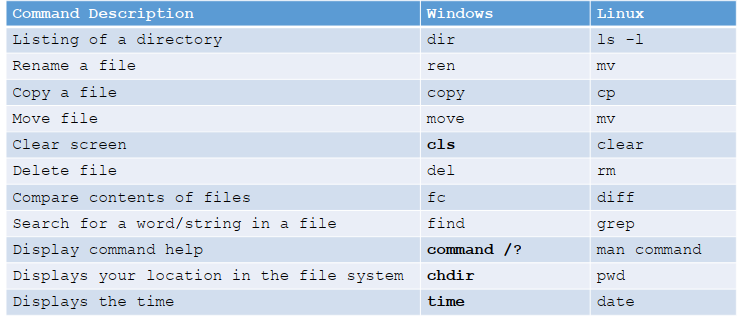